This Notebook is used for prepare Non AMP from various sources and AMP from AMP Converter, and convert them into;
- one single source (fasta) for AMP set 
- one single source (fasta) for non AMP set 

after this, these datset will be further fed into Datapre.ipynb from AMP Detector

In [1]:
import numpy as np

import os 
import pandas as pd
from Bio import SeqIO
import csv
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

# Import libraries 
from Bio import pairwise2 
from Bio.Seq import Seq 

In [55]:
def lengthDistribution(df,title):
    fig = plt.figure()
    ax = fig.gca()
    pd.Series(df['length']).hist(color='blue', bins=200, ax=ax)
    plt.ylabel('Num of Seq with this length ')
    plt.xlabel('Length of Seq')
    plt.title(title)

def plotCharDistribution(dict_counts, char_totalsize, title):
    fig = plt.figure()
    fig.suptitle(title, fontsize=20)
    ax = fig.add_subplot(111)
    # The bar chart, with letters along the horizontal axis and the calculated
    # letter frequencies as percentages as the bar height
    x = range(len(dict_counts))
    letters =  dict_counts.keys()
    ax.bar(x, [val / char_totalsize * 100 for key,val in dict_counts.items()], width=0.8,
        color='g', alpha=0.5, align='center')
    ax.set_xticks(x)
    ax.set_xticklabels(letters)
    ax.tick_params(axis='x', direction='out')
    ax.set_xlim(-0.5, 25.5)
    ax.yaxis.grid(True)
    ax.set_ylabel('Letter frequency, %')

def countProtien(df, title):
    # count Sequence 
    records = df['Sequence']
    print("Count Records:", len(records))
    # countAminoAcids
    counts = Counter()
    for index, row in df.iterrows():
        line= row['Sequence']
        counts.update(line.rstrip())
        total = float(sum(counts.values()))
    sorted_dict = {key: value for key, value in sorted(counts.items())}
    for key,val in sorted_dict.items():
        print("{}: {}, ({:.2%})".format(key,val, val / total))

    plotCharDistribution(sorted_dict, total, title)

In [ ]:
amp_DB_fasta = "/home/kongkitimanonk/SCRATCH_NOBAK/datasets/phase2/amp_clustered100.22DBs.fasta"
uniref50 = "/home/kongkitimanonk/SCRATCH_NOBAK/datasets/phase2/uniref50.len2350.fasta"
non_AMPs_path='/home/kongkitimanonk/SCRATCH_NOBAK/datasets/phase2/non_AMPs.csv'
AMPs_path='/home/kongkitimanonk/SCRATCH_NOBAK/datasets/phase2/AMPs.csv

## AMP

### Fungi

In [23]:

num = len([1 for line in open("fungi/amp._fungi.80.fa") if line.startswith(">")])
num

10522

### MGnify 

1.   mmseqs  easy-search    /home/ubuntu/amp.100_22DB.fasta /mnt/mgy_cluster/mgy_clusters90per_20190531 amp.mgy.nr100 tmp
2. filter with 80% <=  && < 100%

In [13]:

df = pd.read_csv('mgy_targetDB/resultDB.tsv', sep='\t', header=0)
df

,ID_Query,ID_Target,sequence_identity,alignment_length,number_of_mismatches,number_of_gap_openings,start-position_in_query,end-position_in_query,start-position_in_target,end-position_in_target,E-value,bit_score
0,ADAM_4109|adam_test,MGYP000044230481,1.000,69,0,0,1,69,1,69,1.932000e-26,111
1,ADAM_4109|adam_test,MGYP000073057883,0.985,69,1,0,1,69,1,69,1.295000e-25,109
2,ADAM_4109|adam_test,MGYP000280141760,0.971,69,2,0,1,69,1,69,6.322000e-25,107
3,ADAM_4109|adam_test,MGYP000313112163,0.971,71,2,0,1,69,1,71,8.681000e-25,106
4,ADAM_4109|adam_test,MGYP000277577305,0.971,69,2,0,1,69,1,68,4.239000e-24,104
...,...,...,...,...,...,...,...,...,...,...,...,...
1118551,EN19276088|D|B7HAN1|bacteriocin,MGYP000814972054,0.542,59,27,0,3,61,2,60,1.774000e-09,71
1118552,EN19276088|D|B7HAN1|bacteriocin,MGYP001038973936,0.518,54,26,0,26,79,25,78,1.797000e-08,68
1118553,EN19276088|D|B7HAN1|bacteriocin,MGYP000786726776,0.447,76,35,0,96,171,1,64,1.014000e-07,66
1118554,EN19276088|D|B7HAN1|bacteriocin,MGYP001130506861,0.518,54,26,0,5,58,3,56,1.353000e-07,65


In [14]:
df = df.loc[(0.8 <= df['sequence_identity'] )& (df['sequence_identity'] < 1.0) ]
# dropping ALL duplicte values 
df.drop_duplicates(subset ="ID_Target",inplace = True) 
df


,ID_Query,ID_Target,sequence_identity,alignment_length,number_of_mismatches,number_of_gap_openings,start-position_in_query,end-position_in_query,start-position_in_target,end-position_in_target,E-value,bit_score
1,ADAM_4109|adam_test,MGYP000073057883,0.985,69,1,0,1,69,1,69,1.295000e-25,109
2,ADAM_4109|adam_test,MGYP000280141760,0.971,69,2,0,1,69,1,69,6.322000e-25,107
3,ADAM_4109|adam_test,MGYP000313112163,0.971,71,2,0,1,69,1,71,8.681000e-25,106
4,ADAM_4109|adam_test,MGYP000277577305,0.971,69,2,0,1,69,1,68,4.239000e-24,104
5,ADAM_4109|adam_test,MGYP000121254745,0.956,69,3,0,1,69,1,66,1.098000e-23,103
...,...,...,...,...,...,...,...,...,...,...,...,...
1116127,L01A001868|Sequence,MGYP000456894678,0.821,28,5,0,10,37,48,75,3.349000e-04,46
1116128,L01A001868|Sequence,MGYP000601394588,0.821,28,5,0,10,37,48,75,3.349000e-04,46
1116130,L01A001868|Sequence,MGYP001057047278,0.851,27,4,0,10,36,51,77,4.612000e-04,46
1116143,436_pos_train_ds3|pos_train_ds3,MGYP000766917530,0.833,48,8,0,1,48,2,49,6.680000e-18,85


In [ ]:
df['ID_Target'].to_csv('mgy.uniq.80.txt', sep='\t', index=False)

In [ ]:
#3  
seqkit  grep --threads 24 -f /home/ubuntu/mgy.uniq.80.txt  mgy_clusters_20190531.fa -o amp._mgy.80.fa

## Merge all For AMP


In [41]:
#1. manually copy and append to the final file

# read final file
with open('/mnt/vdb/thesis/amp.final.ready.fasta') as fasta_file:  # Will close handle cleanly
    identifiers = []
    lengths = []
    sequence = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        identifiers.append(seq_record.id)
        sequence.append(str(seq_record.seq))
        lengths.append(len(seq_record.seq))

AMPs_df = pd.DataFrame(list(zip(identifiers, sequence, lengths)), columns =['ID', 'Sequence', 'length']) 
AMPs_df # 49273

,ID,Sequence,length
0,EN92515250|C|B3FJD7|phage,MAKKSVPLRKPAGSDGQGNIKVPGGPVVLDLGDFDDIFGPMESESP...,2337
1,EN54061055|C|F8SJ56|phage,MASKKTTLPKPKGINPQGSIVQLDLDDFDDLFDEDFGLPKKNSPYT...,2319
2,EN4815120|C|Q8SCY1|phage,MAKKVTLPKGQTGATGTTLGQAGNILDLSDVDDIFGDTPKAKKGSP...,2237
3,EN3016141|D|D2J8A7|bacteriocin,MAETIKGLRIDLSLKDMGVGRSITELKRSFRTLNSDLKVSSKNFEY...,1619
4,EN9175723|BD|Q93IM3|bacteriocin,MAKKKNTYKVPSIIALTLAGTALTTHHAQAADKTQDQSTNKNILND...,1564
...,...,...,...
49268,jgi|Zymps1|802458|Zp221_scaffold_490_00086,MAPKAQKTPTTAGKAPAGKAPAEKKEAGKKTAAATGDKKKRTKTRK...,138
49269,jgi|Zymps1|799992|Zp221_scaffold_243_00026,MQIFVKTLTGKTITLEVESSDTIDNVKSKIQDKEGIPPDQQRLIFA...,155
49270,jgi|Zymps1|798843|Zp221_scaffold_1786_00020,MTKRTKKVGITGKYGTRYGASLRKQVKKIEISQHARYTCTFCGKVS...,92
49271,jgi|Zymps1|796521|Zp221_scaffold_1352_00011,MDSAKVPVKLVKVTRVLGRTGSRGGVTQVRVEFMDDTTRSIIRNVK...,68


In [42]:
AMPs_df['ID'] = AMPs_df['ID'].str.strip()
AMPs_df['Sequence'] = AMPs_df['Sequence'].str.strip()
## Deduplicate 
AMPs_df.drop_duplicates(subset=['Sequence'],inplace = True)
AMPs_df # 44407

,ID,Sequence,length
0,EN92515250|C|B3FJD7|phage,MAKKSVPLRKPAGSDGQGNIKVPGGPVVLDLGDFDDIFGPMESESP...,2337
1,EN54061055|C|F8SJ56|phage,MASKKTTLPKPKGINPQGSIVQLDLDDFDDLFDEDFGLPKKNSPYT...,2319
2,EN4815120|C|Q8SCY1|phage,MAKKVTLPKGQTGATGTTLGQAGNILDLSDVDDIFGDTPKAKKGSP...,2237
3,EN3016141|D|D2J8A7|bacteriocin,MAETIKGLRIDLSLKDMGVGRSITELKRSFRTLNSDLKVSSKNFEY...,1619
4,EN9175723|BD|Q93IM3|bacteriocin,MAKKKNTYKVPSIIALTLAGTALTTHHAQAADKTQDQSTNKNILND...,1564
...,...,...,...
49264,jgi|Zymar1|771619|Za111_scaffold_384_0026,MTKRTKKVGITGKYGTRYGASLRKQVKKIEISQHARYTCTFCGKVS...,92
49265,jgi|Zymbr1|3072|TI39_contig368g00016T0,MSIWLERFSAPSREQTPSPNPNRPYPASRRSAQLGPSTVPRRPGLQ...,769
49268,jgi|Zymps1|802458|Zp221_scaffold_490_00086,MAPKAQKTPTTAGKAPAGKAPAEKKEAGKKTAAATGDKKKRTKTRK...,138
49269,jgi|Zymps1|799992|Zp221_scaffold_243_00026,MQIFVKTLTGKTITLEVESSDTIDNVKSKIQDKEGIPPDQQRLIFA...,155


In [48]:
AMPs_df.sort_values(by=[ 'length'], ascending= False, inplace=True)

In [56]:
AMPs_df

,ID,Sequence,length
0,EN92515250|C|B3FJD7|phage,MAKKSVPLRKPAGSDGQGNIKVPGGPVVLDLGDFDDIFGPMESESP...,2337
1,EN54061055|C|F8SJ56|phage,MASKKTTLPKPKGINPQGSIVQLDLDDFDDLFDEDFGLPKKNSPYT...,2319
2,EN4815120|C|Q8SCY1|phage,MAKKVTLPKGQTGATGTTLGQAGNILDLSDVDDIFGDTPKAKKGSP...,2237
32843,MGYP001371809267,MGPRKPALRTPLLLLFLLLFLDTSVWAQDEVLENLSFSCPKDATRF...,2178
45766,jgi|Phcap1|495931|estExt_Genemark1.C_140054,MGVFWDSSFRTRFLHLLLFLSPILVSADPVPARAPGPSYSPSRLPQ...,2081
...,...,...,...
20860,653_dbaasp|dbaasp_peptides,FLGALWKVASK,11
20859,654_dbaasp|dbaasp_peptides,FLGALFWVASK,11
20858,655_dbaasp|dbaasp_peptides,FLGALFKWASK,11
20857,656_dbaasp|dbaasp_peptides,FLGALFKVWSK,11


Count Records: 44346
A: 413172, (8.28%)
B: 20, (0.00%)
C: 96715, (1.94%)
D: 244503, (4.90%)
E: 263389, (5.28%)
F: 166525, (3.34%)
G: 406847, (8.15%)
H: 105322, (2.11%)
I: 270558, (5.42%)
J: 73, (0.00%)
K: 416682, (8.35%)
L: 383581, (7.68%)
M: 108205, (2.17%)
N: 215699, (4.32%)
O: 105, (0.00%)
P: 203020, (4.07%)
Q: 181669, (3.64%)
R: 327982, (6.57%)
S: 323646, (6.48%)
T: 300666, (6.02%)
U: 6, (0.00%)
V: 336462, (6.74%)
W: 60398, (1.21%)
X: 3288, (0.07%)
Y: 163509, (3.28%)
Z: 42, (0.00%)


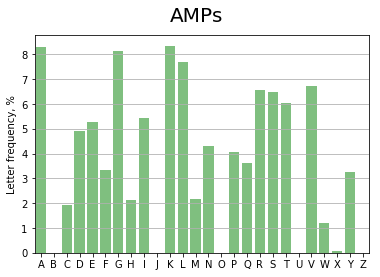

In [43]:
countProtien(AMPs_df,"AMPs")

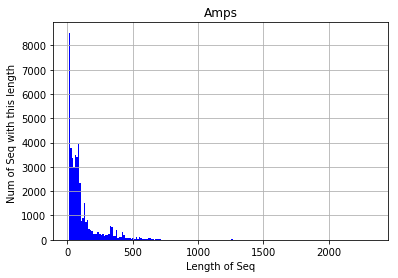

In [44]:
lengthDistribution(AMPs_df,"Amps")

In [55]:
#AMPs30_df = AMPs_df[AMPs_df['length'] <= 30]
with open("amp30.final.ready.fasta", 'w') as file:
    for index, row in AMPs30_df.iterrows():
        file.write('>'+ row['ID'] + '\n')
        file.write(row['Sequence'] + '\n')
file.close()

In [46]:
#with open("amp.final.ready.fasta", 'w') as file:
    for index, row in AMPs_df.iterrows():
        file.write('>'+ row['ID'] + '\n')
        file.write(row['Sequence'] + '\n')
file.close()

## Non AMP

In [49]:
# constrcut badlist
amp_uniref_df = pd.read_csv('/mnt/vdb/thesis/uniref50/amp.forNONAMP.uniref50_2400.m8', sep='\t', header=0)
amp_uniref_df

,ID_Query,ID_Target,sequence_identity,alignment_length,number_of_mismatches,number_of_gap_openings,start-position_in_query,end-position_in_query,start-position_in_target,end-position_in_target,E-value,bit_score
0,EN92515250|C|B3FJD7|phage,UniRef50_B3FJD7,1.000,2337,0,0,1,2337,1,2337,0.000000e+00,4547
1,EN92515250|C|B3FJD7|phage,UniRef50_A0A1Y0SZ10,0.466,2337,1242,0,1,2337,1,2326,0.000000e+00,1858
2,EN92515250|C|B3FJD7|phage,UniRef50_F8SJ56,0.416,2336,1353,0,1,2336,1,2318,0.000000e+00,1628
3,EN92515250|C|B3FJD7|phage,UniRef50_A0A481W507,0.365,2135,1334,0,33,2134,22,2156,0.000000e+00,1171
4,EN92515250|C|B3FJD7|phage,UniRef50_Q8SCY1,0.349,2141,1346,0,1,2141,1,2069,0.000000e+00,1119
...,...,...,...,...,...,...,...,...,...,...,...,...
10191502,jgi|Copscl1|604239|estExt_Genemark1.C_650036,UniRef50_UPI000E6E4B9B,0.726,73,20,0,59,131,2,74,2.754000e-23,104
10191503,jgi|Copscl1|604239|estExt_Genemark1.C_650036,UniRef50_A0A3B5QMM9,0.647,85,29,0,24,107,17,101,9.724000e-23,102
10191504,jgi|Copscl1|604239|estExt_Genemark1.C_650036,UniRef50_B4IPI1,0.724,69,19,0,63,131,1,69,1.827000e-22,102
10191505,jgi|Copscl1|604239|estExt_Genemark1.C_650036,UniRef50_A8JIV7,0.536,97,44,0,35,130,13,109,1.827000e-22,102


In [58]:
bad_list = amp_uniref_df[amp_uniref_df['sequence_identity'] >=0.3]['ID_Target'].tolist()

Count each AMP length 

In [72]:
df_count=AMPs_df.groupby('length').length.count().reset_index(name='count').sort_values(['count'], ascending=False)
#df_count.to_csv('df_count.csv', index=False)
_tmp_df_count =df_count
_tmp_df_count

,length,count
9,20,1131
2,13,1119
1,12,912
7,18,873
4,15,855
...,...,...
728,836,1
729,839,1
730,840,1
731,842,1


,length,count
862,2319,1


In [ ]:
nonAMPs_csv = "/mnt/vdb/thesis/non_AMPs.csv"
uniref50 = "/mnt/vdb/thesis/uniref50/uniref50.len2400.fasta"
NonAMPs_csv = open(nonAMPs_csv, 'w')
NonAMPs_csv.write('"ID","Sequence","length"'+ '\n')
record = SeqIO.parse(uniref50, "fasta")
for seq_record in record:
    if str(seq_record.id) in bad_list:
        continue

    seqLen = len(str(seq_record.seq))
    # update value
    _tmp_row = _tmp_df_count.loc[ _tmp_df_count['length'] == seqLen]
    if not _tmp_row.empty and  _tmp_row['count'].values > 0:
        # print (str(_tmp_row['length']) +" "+ str(_tmp_row['count']))
        NonAMPs_csv.write('"'+str(seq_record.id)+'","'+str(seq_record.seq)+'","'+ str(seqLen)+'"' + '\n')
        _tmp_df_count.at[ _tmp_row.index,'count']= _tmp_row['count'] - 1
    else:
        if _tmp_df_count['count'].values.sum() == 0:
            print("stop: found every range")
            break


In [ ]:
_tmp_df_count.to_csv('remained_count.txt', index=False)

In [ ]:
NonAMPs_csv.close()

## Merge NonAMP and AMP

In [56]:
with open('/mnt/vdb/thesis/amp.final.ready.fasta') as fasta_file:  # Will close handle cleanly
    identifiers = []
    lengths = []
    sequence = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        identifiers.append(seq_record.id)
        sequence.append(str(seq_record.seq))
        lengths.append(len(seq_record.seq))

AMPs_df = pd.DataFrame(list(zip(identifiers, sequence, lengths)), columns =['ID', 'Sequence', 'length']) 
AMPs_df # 44346

,ID,Sequence,length
0,EN92515250|C|B3FJD7|phage,MAKKSVPLRKPAGSDGQGNIKVPGGPVVLDLGDFDDIFGPMESESP...,2337
1,EN54061055|C|F8SJ56|phage,MASKKTTLPKPKGINPQGSIVQLDLDDFDDLFDEDFGLPKKNSPYT...,2319
2,EN4815120|C|Q8SCY1|phage,MAKKVTLPKGQTGATGTTLGQAGNILDLSDVDDIFGDTPKAKKGSP...,2237
3,EN3016141|D|D2J8A7|bacteriocin,MAETIKGLRIDLSLKDMGVGRSITELKRSFRTLNSDLKVSSKNFEY...,1619
4,EN9175723|BD|Q93IM3|bacteriocin,MAKKKNTYKVPSIIALTLAGTALTTHHAQAADKTQDQSTNKNILND...,1564
...,...,...,...
44341,jgi|Zymar1|771619|Za111_scaffold_384_0026,MTKRTKKVGITGKYGTRYGASLRKQVKKIEISQHARYTCTFCGKVS...,92
44342,jgi|Zymbr1|3072|TI39_contig368g00016T0,MSIWLERFSAPSREQTPSPNPNRPYPASRRSAQLGPSTVPRRPGLQ...,769
44343,jgi|Zymps1|802458|Zp221_scaffold_490_00086,MAPKAQKTPTTAGKAPAGKAPAEKKEAGKKTAAATGDKKKRTKTRK...,138
44344,jgi|Zymps1|799992|Zp221_scaffold_243_00026,MQIFVKTLTGKTITLEVESSDTIDNVKSKIQDKEGIPPDQQRLIFA...,155
